# Relatório Parcial - Maratona de Filmes

### Autor: José Rafael Fernandes
---

### Objetivo

O projeto Maratona de Filmes consiste na criação de um algoritmo para maximizar o número de filmes assistidos em um único dia. Vale ressaltar que o projeto conta com duas implementações diferentes para o algoritmo, utilizando diferentes heurísticas. A primeira implementação utiliza o algoritmo guloso, enquanto a segunda utiliza o algoritmo guloso aleatorizado. O objetivo do relatório é comparar os resultados obtidos por cada algoritmo, bem como analisar a influência de cada heurística utilizada.

### Descrição do Problema

Como citado anteriormente, o algoritmo tem como objetivo maximizar o número de filmes assistidos em um único dia. Entretanto, existem algumas restrições que devem ser levadas em consideração. A primeira delas é que cada filme pertence a uma categoria e cada categoria tem um máximo de filmes que podem ser assistidos. Além disso, cada filme possui um tempo de duração, e não se pode começar a assistir outro filme antes de terminar o anterior. Por fim, o algoritmo deve ser capaz de receber um arquivo .txt de entrada, contendo as informações dos filmes, e retornar um arquivo .txt de saída, contendo o número de filmes assistidos e a lista de filmes assistidos. Abaixo, é possível ver um exemplo de arquivo de entrada e de saída.

##### Arquivo de Entrada

``` txt
10 4
1 3 1 2 
11 13 3
14 15 3
10 16 2
10 14 1
11 17 2
11 14 3
13 15 3
14 15 1
12 16 4
12 13 4
```

##### Arquivo de Saída

``` txt
2
11 13 3
14 15 1
```


## Implementação

A ideia da implementação pode ser resumida nos seguintes passos:
- Ler o arquivo de entrada e armazenar as informações em estruturas de dados;
- Ordenar os filmes por horario de término;
- Excluir os filmes inválidos (terminam em outro dia ou terminam e começam no mesmo horário);
- Escolher os filmes que serão assistidos;
    - Para a implementação da heurística gulosa, escolhemos sempre o filme que termina mais cedo, desde que não ultrapasse o limite de filmes por categoria e seu período de exibição esteja disponível;
    - Para a implementação da heurística gulosa aleatorizada, existe 25% de chance de escolhermos um filme aleatório da lista, obedencendo as restrições, e 75% de chance de utilizarmos a estratégia gulosa;
- Escrever o arquivo de saída com a quantidade de filmes assistidos e a lista de filmes assistidos.

Seguindo essa ideia, a implementação dos algoritmos foi feita em C++ e dividida em uma série de funções que realizam tarefas específicas. A seguir, todas as funções são descritas e comentadas:

### Algortimo Guloso

Antes da implementação das funções do algoritmo, é necessário definir uma estrutura de dados que será essencial para o algoritmo. A estrutura de dados escolhida foi a seguinte:

``` cpp
struct movie {
    int startTime;
    int endTime;
    int category;
};
```

A estrutura de dados acima representa um filme, contendo o horário de início, o horário de término e a categoria do filme. A seguir, foi necessária a criação de uma função para conferir se os argumentos passados para o programa são válidos. A função utilizada para conferir os argumentos foi a seguinte:

``` cpp
bool validateArgs(int argc, char *argv[]) {
    if (argc < 2) {
        cerr << "Usage: " << argv[0] << " <filename>" << endl;
        return false;
    }
    return true;
}
```

Depois disso, uma função para abrir o arquivo de entrada e verificar possíveis erros nesse processo foi criada.

``` cpp
bool openFile(const char* filename, ifstream& infile) {
    // Open the file for reading
    infile.open(filename);

    // Check if the file was opened successfully
    if (!infile.is_open()) {
        cerr << "Error: could not open file " << filename << endl;
        return false;
    }

    return true;
}
```

A função acima recebe como argumento o nome do arquivo de entrada e um objeto do tipo ifstream. A função retorna true caso o arquivo seja aberto com sucesso e false caso contrário. A seguir, uma função para ordenar os filmes de acordo com o horário de término foi criada.

``` cpp
void sortMoviesByEndTime(vector<movie>& movies) {
    sort(movies.begin(), movies.end(), [](const movie& a, const movie& b) {
        return a.endTime < b.endTime;
    });
}
``` 

A função acima recebe como argumento um vetor de filmes e altera esse vetor ordenado de acordo com o horário de término. Após isso, uma função para remover filmes invalidos foi criada.

``` cpp
void filterMovies(vector<movie>& movies) {
    movies.erase(remove_if(movies.begin(), movies.end(), [](const movie& m) {
        return m.endTime <= m.startTime;
    }), movies.end());
}
```

A função acima recebe como argumento um vetor de filmes e altera esse vetor, retirando os filmes inválidos. Um filme é considerado inválido quando o horário de término é menor que o horário de início ou quando o horário de início e o horário de término são iguais. Depois, uma função para escolher os filmes a serem assistidos foi criada.

``` cpp
vector<movie> chooseMovies(vector<movie>& movies, vector<int>& categoriesMax){
    bitset<24> movieTimesOccupied;
    vector<movie> chosenMovies;

    for (int i = 0; i < movies.size(); i++) {
        if (checkIfMovieFits(movieTimesOccupied, movies[i]) && categoriesMax[movies[i].category-1] > 0) {
            chosenMovies.push_back(movies[i]);
            movieTimesOccupied = occupiedTimes(movieTimesOccupied, movies[i]);
            categoriesMax[movies[i].category-1]--;
        }
        if (categoriesMax == vector<int>(categoriesMax.size(), 0)) {
            break;
        }
    }

    return chosenMovies;
} 
```

A função acima recebe como argumento um vetor de filmes e um vetor de inteiros. O vetor de filmes representa os filmes que podem ser assistidos e o vetor de inteiros representa o número máximo de filmes que podem ser assistidos de cada categoria. A função retorna um vetor de filmes contendo os filmes que foram escolhidos para serem assistidos. A função acima é a função principal do algoritmo guloso. Vale ressaltar que a função acima utiliza outras funções auxiliares, que serão descritas a seguir.

``` cpp
bitset<24> occupiedTimes(bitset<24>& times, movie movie){
    for (int i = movie.startTime; i < movie.endTime; i++) {
        times[i] = 1;
    }
    return times;
}

bool checkIfMovieFits(bitset<24>& times, movie movie){
    for (int i = movie.startTime; i < movie.endTime; i++) {
        if (times[i] == 1) {
            return false;
        }
    }
    return true;
}
```

A função occupiedTimes recebe como argumento um bitset de 24 posições (representando as horas do dia) e um filme. A função retorna um bitset de 24 posições com os horários ocupados pelo filme passado como argumento. A função checkIfMovieFits recebe como argumento um bitset de 24 posições e um filme. A função retorna true caso o filme passado como argumento caiba no horário disponível e false caso contrário.

Por fim, todas as funções citadas acimas foram utilizadas na função main para a implementação do algoritmo guloso.

``` cpp
int main(int argc, char *argv[]) {
    // Validate the command line arguments
    if (!validateArgs(argc, argv)) {
        return 1;
    }

    ifstream infile;
    // Check if the file was opened successfully
    if (!openFile(argv[1], infile)) {
        return 1;
    }

    // Create the variables to store the data
    int N;
    int M;
    vector<movie> movies;
    vector<int> categoriesMax;

    // Read the first line of the file and store the first int in N and the second in M
    infile >> N >> M;

    // Read the second line of the file and store the ints in categoriesMax
    for (int i = 0; i < M; i++) {
        int categoryMax;
        infile >> categoryMax;
        categoriesMax.push_back(categoryMax);
    }

    // Read the rest of the file and store the ints of each line in movies
    for (int i = 0; i < N; i++) {
        movie movie;
        infile >> movie.startTime >> movie.endTime >> movie.category;
        movies.push_back(movie);
    }

    // Close the file
    infile.close();


    sortMoviesByEndTime(movies);

    filterMovies(movies);
    
    vector<movie> chosenMovies = chooseMovies(movies, categoriesMax);
    
    cout << chosenMovies.size() << endl;
    for (int i = 0; i < chosenMovies.size(); i++) {
        cout << chosenMovies[i].startTime << " " << chosenMovies[i].endTime << " " << chosenMovies[i].category << endl;
    }
    
    return 0;
}
```

### Algoritmo Guloso Aleatorizado

O algoritmo guloso aleatorizado é uma variação do algoritmo guloso. A diferença entre os dois algoritmos é que o algoritmo guloso aleatorizado possui 25% de chance de escolher aleatoriamente entre os filmes que passam no teste de tempo. Para a implementação dessa alteração, a função chooseMovies foi alterada.

``` cpp
vector<movie> chooseMovies(vector<movie>& movies, vector<int>& categoriesMax){
    bitset<24> movieTimesOccupied;
    vector<movie> chosenMovies;

    int seed = 10;
    char *SEED_VAR = getenv("SEED");
    if (SEED_VAR != NULL)
    {
        seed = atoi(SEED_VAR);
    }
    default_random_engine generator(seed);
    uniform_real_distribution<double> distribution(0.0, 1.0);


    for (int i = 0; i < movies.size(); i++) {
        double rnd_num = distribution(generator); 
        if (rnd_num <= 0.25) {
            int randomMovieIndex = rand() % movies.size();
            if (checkIfMovieFits(movieTimesOccupied, movies[randomMovieIndex]) && categoriesMax[movies[randomMovieIndex].category-1] > 0) {
                chosenMovies.push_back(movies[randomMovieIndex]);
                movieTimesOccupied = occupiedTimes(movieTimesOccupied, movies[randomMovieIndex]);
                categoriesMax[movies[randomMovieIndex].category-1]--;
            }
        }
        else {
            if (checkIfMovieFits(movieTimesOccupied, movies[i]) && categoriesMax[movies[i].category-1] > 0) {
                chosenMovies.push_back(movies[i]);
                movieTimesOccupied = occupiedTimes(movieTimesOccupied, movies[i]);
                categoriesMax[movies[i].category-1]--;

            }
        }
        if (categoriesMax == vector<int>(categoriesMax.size(), 0)) {
            break;
        }
    }

    return chosenMovies;
} 
``` 

## Profiling

Depois de implementar os algoritmos, foi necessário realizar o profiling dos mesmos. Assim, a ferramenta *valgrind* foi utilizada, com o objetivo de entender o comportamento de memória dos algoritmos e possíveis áreas de otimização. O comando utilizado para o profiling foi o seguinte:

``` bash
valgrind --tool=callgrind ./{programa utilizado} inputs/in-10000-6.txt
callgrind_annotate callgrind.out.{pid do valgrind} {codigo fonte do programa}
```

Abaixo, estão os resultados do profiling dos algoritmos.

### Algoritmo Guloso


In [1]:
%%bash
callgrind_annotate callgrind.out.446428 guloso.cpp

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.446428' (creator: callgrind-3.18.1)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 862880
Trigger: Program termination
Profiled target:  ./guloso inputs/in-1000-32.txt (PID 446428, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   guloso.cpp
Auto-annotation:  on

--------------------------------------------------------------------------------
Ir                 
--------------------------------------------------------------------------------
4,830,162 (100.0%)  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir                  file:function
--------------------------------------------------------------------------------
1,407,552 (29.14%)  /usr/src/debug/

### Algoritmo Guloso Aleatorizado

In [3]:
%%bash
callgrind_annotate callgrind.out.446770 guloso.cpp

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.446770' (creator: callgrind-3.18.1)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 866752
Trigger: Program termination
Profiled target:  ./aleatorizado inputs/in-1000-32.txt (PID 446770, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   guloso.cpp
Auto-annotation:  on

--------------------------------------------------------------------------------
Ir                 
--------------------------------------------------------------------------------
4,872,439 (100.0%)  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir                  file:function
--------------------------------------------------------------------------------
1,407,820 (28.89%)  /usr/src/

### Análise dos Resultados de Profiling

Analisando os resultados do profiling podemos ver que o algoritmo guloso um pouco menos de instruções que o aleatorizado, cerca de 40 mil. Além disso, podemos ver que os trechos menos otimizados são os for loops utilizados no código e algumas implementações de bibliotecas utilizadas.

## Comparação dos Algoritmos

Para a comparação dos algoritmos vamos utilizar duas perspectivas diferentes. A primeira delas é em relação ao tempo de execução em função do aumento de filmes e categorias. A segunda é em relação ao número de filmes escolhidos em função do aumento de filmes e categorias.

Para isso, vamos utilizar os inputs gerados pelo script fornecido *geradorInputs.cpp* e executar os algoritmos com cada um dos inputs gerados. Os resultados serão armazenados em arquivos de texto, que serão utilizados para gerar os gráficos. Para a geração dos arquivos de entrada, o seguinte script em python foi utilizado:

``` python
varia_filmes = [100, 1000, 10000, 100000, 1000000, 10000000]
varia_categorias = [2, 4, 8, 16, 32, 64]

!g++ -I/usr/local/Cellar/boost/1.75.0/include -L/usr/local/Cellar/boost/1.75.0/lib -lboost_random geradorInputs.cpp -o geradorInputs

for i in varia_filmes:
    for j in varia_categorias:
        !./geradorInputs {i} {j}
        !mv input.txt inputs/in-{i}-{j}.txt
```

Que resultou em 32 arquivos de entrada, cada um com um número de filmes e categorias diferente.
Assim, vamos executar os algoritmos com cada um dos arquivos de entrada gerados e armazenar os resultados em arquivos de texto, além de todas as métricas em um arquivo csv. Dessa forma, na próxima seção, vamos analisar os resultados obtidos.

### Tempo de Execução

In [5]:
# Tabela de tempo de execução
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

df = pd.read_csv('outputs/data.csv')

df = df.set_index(['num_filmes', 'num_categorias'])

df_runtime = df[['runtime_guloso', 'runtime_aleatorizado']]

df_runtime

runtime_guloso  runtime_aleatorizado
num_filmes num_categorias                                      
10000000   16                    9.567816             10.427446
           2                     6.983550              7.099456
           32                    9.810081             10.710194
           4                     8.211357              7.686642
           64                   11.032710             12.172805
           8                     9.483345              9.755097
1000000    16                    1.073596              1.170937
           2                     0.822229              0.820664
           32                    1.143875              1.221123
           4                     0.879825              0.850475
           64                    1.179914              1.294760
           8                     1.085309              1.152024
100000     16                    0.326444              0.331458
           2                     0.310207              0.296708
           32                    0.320990              0.343632
           4                     0.294250              0.305080
           64                    0.336143              0.338787
           8                     0.321957              0.329683
10000      16                    0.223153              0.257990
           2                     0.241265              0.253303
           32                    0.257402              0.273841
           4                     0.272439              0.241867
           64                    0.241367              0.270703
           8                     0.259660              0.266083
1000       16                    0.253526              0.251504
           2                     0.225245              0.242167
           32                    0.227341              0.249723
           4                     0.250222              0.310034
           64                    0.274353              0.253531
           8                     0.244991              0.261563
100        16                    0.245917              0.243898
           2                     0.253868              0.245338
           32                    0.246490              0.247296
           4                     0.248735              0.247809
           64                    0.235465              0.243284
           8                     0.248876              0.255934

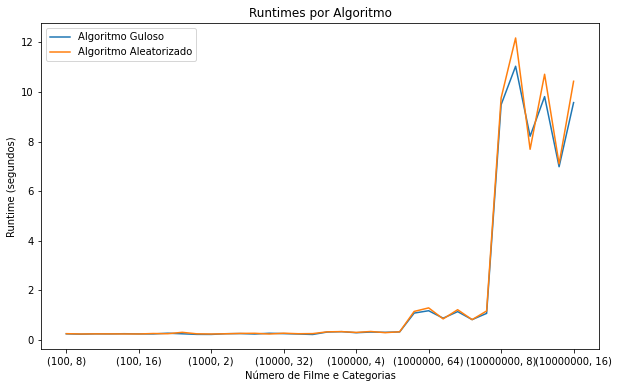

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
df_runtime['runtime_guloso'].plot(ax=ax, label='Algoritmo Guloso')
df_runtime['runtime_aleatorizado'].plot(ax=ax, label='Algoritmo Aleatorizado')
ax.set_xlabel('Número de Filme e Categorias')
ax.set_ylabel('Runtime (segundos)')
ax.set_title('Runtimes por Algoritmo')
plt.gca().invert_xaxis()
ax.legend()
plt.show()

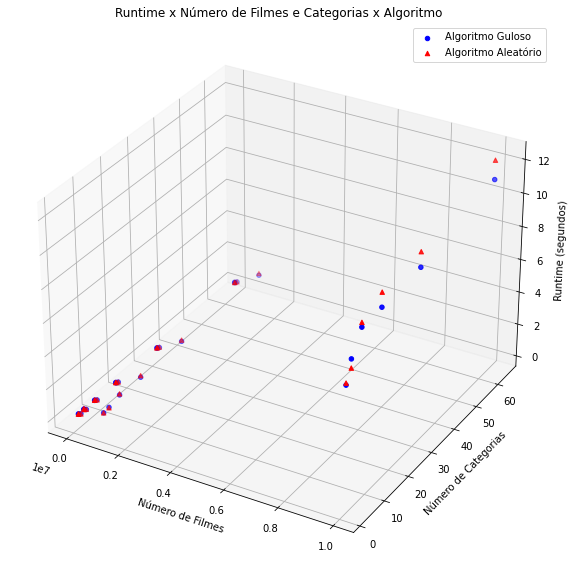

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x = df_runtime.index.get_level_values(0)
y = df_runtime.index.get_level_values(1)
z_guloso = df_runtime['runtime_guloso']
z_aleatorio = df_runtime['runtime_aleatorizado']
ax.scatter(x, y, z_guloso, c='blue', marker='o', label='Algoritmo Guloso')
ax.scatter(x, y, z_aleatorio, c='red', marker='^', label='Algoritmo Aleatório')
ax.set_xlabel('Número de Filmes')
ax.set_ylabel('Número de Categorias')
ax.set_zlabel('Runtime (segundos)')
ax.legend()
plt.title('Runtime x Número de Filmes e Categorias x Algoritmo') 
plt.show()

De acordo com os resultados acima, vemos os  que o algoritmo guloso é mais rápido que o algoritmo aleatório para todos os tamanhos de entrada. No entanto, a diferença no tempo de execução diminui com o aumento do número e da categoria de filmes. Isso mostra que os algoritmos gulosos são mais eficientes com tamanhos de entrada pequenos, mas o desempenho cai rapidamente para tamanhos de entrada grandes. Também, vale ressaltar que independente do algoritmo utilizado, o tempo de execução cresce exponencialmente com o número de categorias e filmes. 

### Tempo de Tela

In [8]:
df_screen_time = df[['screen_time_guloso', 'screen_time_aleatorio']]
df_screen_time

screen_time_guloso  screen_time_aleatorio
num_filmes num_categorias                                           
10000000   16                            23.0                   23.0
           2                              2.0                    6.0
           32                            23.0                   23.0
           4                              8.0                   17.0
           64                            23.0                   23.0
           8                             23.0                   23.0
1000000    16                            23.0                   23.0
           2                              3.0                   12.0
           32                            23.0                   23.0
           4                             11.0                   23.0
           64                            23.0                   23.0
           8                             23.0                   23.0
100000     16                            23.0                   23.0
           2                              4.0                   11.0
           32                            23.0                   23.0
           4                             12.0                   20.0
           64                            23.0                   23.0
           8                             23.0                   23.0
10000      16                            23.0                   23.0
           2                              2.0                    4.0
           32                            23.0                   23.0
           4                             11.0                   23.0
           64                            23.0                   23.0
           8                             23.0                   23.0
1000       16                            23.0                   23.0
           2                              3.0                    3.0
           32                            22.0                   23.0
           4                             15.0                   22.0
           64                            23.0                   23.0
           8                             23.0                   23.0
100        16                            21.0                   22.0
           2                              5.0                    5.0
           32                            18.0                   20.0
           4                             17.0                   18.0
           64                            23.0                   17.0
           8                             21.0                   21.0

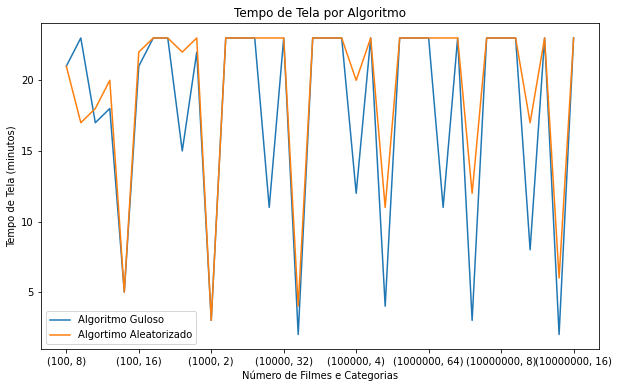

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
df_screen_time['screen_time_guloso'].plot(ax=ax, label='Algoritmo Guloso')
df_screen_time['screen_time_aleatorio'].plot(ax=ax, label='Algortimo Aleatorizado')
ax.set_xlabel('Número de Filmes e Categorias')
ax.set_ylabel('Tempo de Tela (minutos)')
ax.set_title('Tempo de Tela por Algoritmo')
plt.gca().invert_xaxis()
ax.legend()
plt.show()

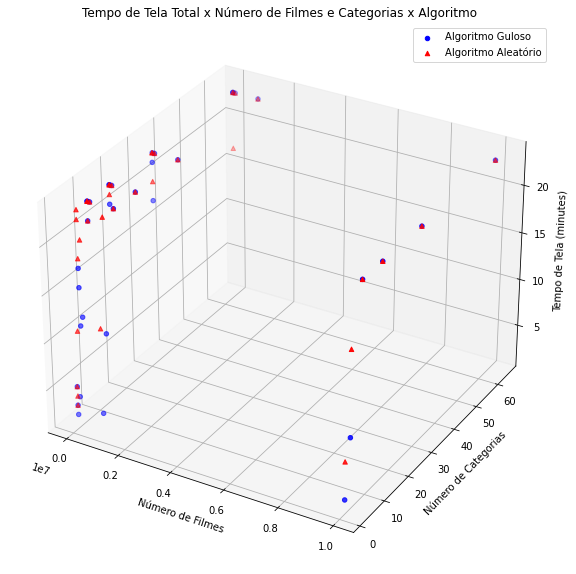

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x = df_screen_time.index.get_level_values(0)
y = df_screen_time.index.get_level_values(1)
z_guloso = df_screen_time['screen_time_guloso']
z_aleatorio = df_screen_time['screen_time_aleatorio']
ax.scatter(x, y, z_guloso, c='blue', marker='o', label='Algoritmo Guloso')
ax.scatter(x, y, z_aleatorio, c='red', marker='^', label='Algoritmo Aleatório')
ax.set_xlabel('Número de Filmes')
ax.set_ylabel('Número de Categorias')
ax.set_zlabel('Tempo de Tela (minutes)')
ax.legend()
plt.title('Tempo de Tela Total x Número de Filmes e Categorias x Algoritmo')
plt.show()

De acordo com os gráficos acima, podemos observar que a medida que as categorias aumentam, ambos os algoritmos tendem a possuir um tempo de tela elevado próximo ao limite. Entretanto, quando temos um menor número de categorias, o algoritmo guloso aleatorizado tende a ter um tempo de tela maior que o guloso. Portanto, o algoritmo guloso aleatorizado é mais eficiente em termos de tempo de tela quando temos um número menor de categorias. 

### Número de Filmes Escolhidos

In [11]:
df_filmes = df[['amount_of_films_guloso', 'amount_of_films_aleatorizado']]
df_filmes

amount_of_films_guloso  \
num_filmes num_categorias                           
10000000   16                                  23   
           2                                    2   
           32                                  23   
           4                                    8   
           64                                  23   
           8                                   23   
1000000    16                                  23   
           2                                    3   
           32                                  23   
           4                                   11   
           64                                  23   
           8                                   23   
100000     16                                  23   
           2                                    4   
           32                                  23   
           4                                   12   
           64                                  23   
           8                                   23   
10000      16                                  23   
           2                                    2   
           32                                  23   
           4                                   11   
           64                                  23   
           8                                   23   
1000       16                                  22   
           2                                    2   
           32                                  22   
           4                                   13   
           64                                  23   
           8                                   22   
100        16                                  12   
           2                                    3   
           32                                  12   
           4                                   10   
           64                                  10   
           8                                   11   

                           amount_of_films_aleatorizado  
num_filmes num_categorias                                
10000000   16                                        11  
           2                                          2  
           32                                        11  
           4                                          8  
           64                                        12  
           8                                         12  
1000000    16                                        13  
           2                                          3  
           32                                        12  
           4                                         11  
           64                                        12  
           8                                         13  
100000     16                                        11  
           2                                          4  
           32                                        11  
           4                                         12  
           64                                        11  
           8                                          9  
10000      16                                        12  
           2                                          2  
           32                                        13  
           4                                         10  
           64                                        12  
           8                                         14  
1000       16                                        10  
           2                                          2  
           32                                        14  
           4                                         10  
           64                                        13  
           8                                         10  
100        16                                        11  
           2                                          3  
           32                           

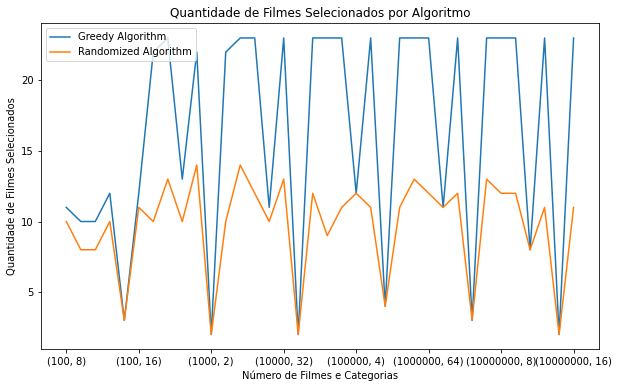

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
df_filmes['amount_of_films_guloso'].plot(ax=ax, label='Greedy Algorithm')
df_filmes['amount_of_films_aleatorizado'].plot(ax=ax, label='Randomized Algorithm')
ax.set_xlabel('Número de Filmes e Categorias')
ax.set_ylabel('Quantidade de Filmes Selecionados')
ax.set_title('Quantidade de Filmes Selecionados por Algoritmo')
plt.gca().invert_xaxis()
ax.legend()
plt.show()

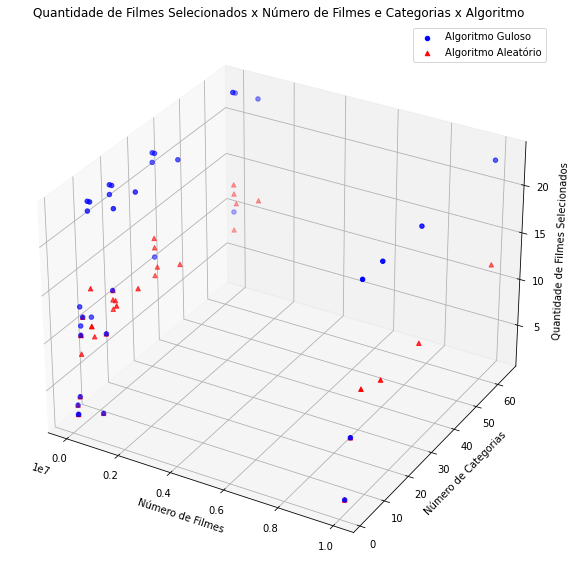

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x = df_filmes.index.get_level_values(0)
y = df_filmes.index.get_level_values(1)
z_guloso = df_filmes['amount_of_films_guloso']
z_aleatorio = df_filmes['amount_of_films_aleatorizado']
ax.scatter(x, y, z_guloso, c='blue', marker='o', label='Algoritmo Guloso')
ax.scatter(x, y, z_aleatorio, c='red', marker='^', label='Algoritmo Aleatório')
ax.set_xlabel('Número de Filmes')
ax.set_ylabel('Número de Categorias')
ax.set_zlabel('Quantidade de Filmes Selecionados')
ax.legend()
plt.title('Quantidade de Filmes Selecionados x Número de Filmes e Categorias x Algoritmo')
plt.show()

Podemos observar que o algoritmo guloso geralmente encontra mais filmes do que o algoritmo guloso aleatorizado. No entanto, a heurística aleatória supera a heurística gulosa em alguns casos, especialmente em casos com poucos filmes e muitas categorias. Além disso, o número de filmes encontrados pelo algoritmo tende a aumentar com o número de filmes e categorias disponíveis. Em geral, esses resultados mostram que as heurísticas gulosas funcionam bem para encontrar o maior número possível de filmes em cenários com muitos filmes disponíveis, enquanto os métodos aleatórios são ligeiramente mais eficazes em cenas com poucos filmes e muitas categorias. 